# Logistic Regression 

INFO 371 Spring 2018

Lab created by: Christie Gan

Deadline: 5/2/18 11:59PM

Last Edit: 4/30/2018

In linear regression, the outcome (dependent variable) is continuous. It can have any one of an infinite number of possible values.

In logistic regression, the outcome (dependent variable) has only a limited number of possible values. So, it is used when the dependent variable is categorical in nature. With the dependent variable categorical, we know this regression will be classifying data into seperate groups. We'll look at iris data on the different species of flowers. Our task is to predict the species based on the flower data. The data contains sepal and petal information. Based on the sepal and petal sizes, we'll classify the flower species using logistic regression and regularization. The dataset includes leaf data for three species of iris: setosa, virginica, and versicolor

In [65]:
# import packages
from sklearn.linear_model import LogisticRegression as lr
import seaborn as sb
#and any other packages you want to use
import matplotlib.pyplot as plt
import pandas as pd

In [66]:
# Load the iris dataset 
from sklearn import datasets
iris = datasets.load_iris()

### 1.) Learn more about the dataset using .DESCR. Print out the dataset's target and features.

In [92]:
print(iris.DESCR)
df = pd.DataFrame(columns=iris.feature_names, data=iris.data)
df['outcome'] = iris.target


Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

### 2.) Draw various graphs that visualize the different species by color. 
Select two of these features and
create a scatterplot where you label the different species by
different color. Do this for different combinations of two features on the axes.

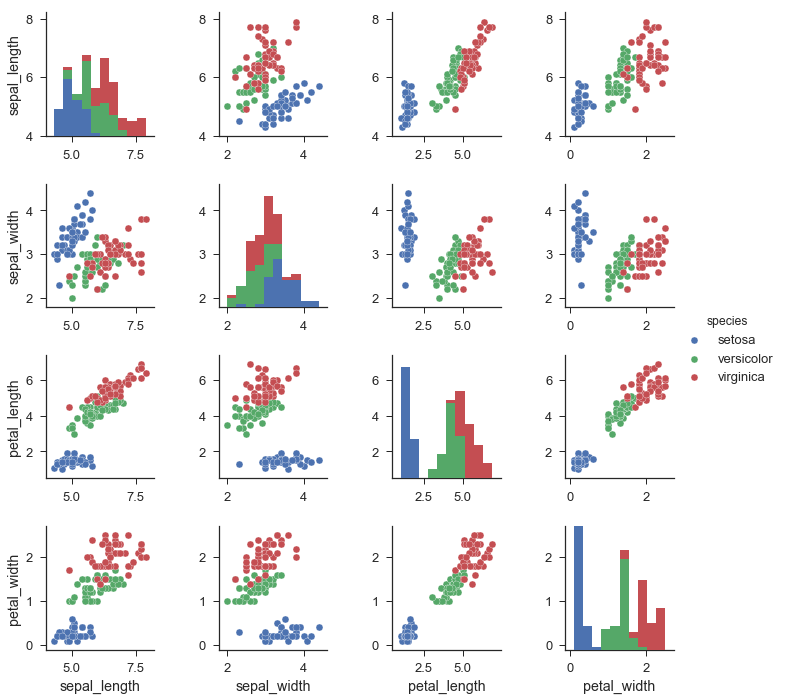

In [35]:
sb.set(font_scale=1.3, style='ticks')
iris1=sb.load_dataset("iris")
plot = sb.pairplot(iris1, hue='species')

plt.show()

### 3.) Classify the flowers' species based on the petal and sepal data (predictors). Since the standard logistic regression can only handle two groups, we only select two species at time. Select a subset of data that only contains setosa and virginica observations. Estimate a logistic regression model on this subset using all 4 features (petal length and width, sepal length and width). 

Include:
* printing the estimated probability coefficients 
* categorize the same observations to the species 
* Compute your prediction accuracy, precision, and recall

In [95]:
df1 = data_pd.loc[data_pd.outcome == 0,:]
df2 = data_pd.loc[data_pd.outcome == 2,:]
df3 = pd.concat([df1, df2], ignore_index=True)
features = df3.drop(['outcome'], axis = 1)
outcome = df3.outcome

from sklearn.model_selection import train_test_split # typically done at the start of the script
x_train, x_test, y_train, y_test = train_test_split(features, outcome, test_size = 0.3)

logreg = LogisticRegression()
m = logreg.fit(x_train, y_train)
preds = m.predict_proba(x_test)
print('probability coefficients\n', preds)
flowers = []
for i in range(len(preds)):
    if(preds[i,0] > preds[i,1]):
        flower = 'setosa'
    else:
        flower = 'virginica'
    flowers.append(flower)
print('observarions catagorized for species\n', flowers)

probability coefficients
 [[0.01888921 0.98111079]
 [0.97171141 0.02828859]
 [0.99121    0.00879   ]
 [0.01290373 0.98709627]
 [0.00764071 0.99235929]
 [0.97171141 0.02828859]
 [0.00279959 0.99720041]
 [0.97913936 0.02086064]
 [0.98420477 0.01579523]
 [0.03117402 0.96882598]
 [0.00480574 0.99519426]
 [0.9830372  0.0169628 ]
 [0.01775571 0.98224429]
 [0.97199394 0.02800606]
 [0.9836165  0.0163835 ]
 [0.98529945 0.01470055]
 [0.97855264 0.02144736]
 [0.98932432 0.01067568]
 [0.00793613 0.99206387]
 [0.99076688 0.00923312]
 [0.97565801 0.02434199]
 [0.97801878 0.02198122]
 [0.98489159 0.01510841]
 [0.03374586 0.96625414]
 [0.01269029 0.98730971]
 [0.01767324 0.98232676]
 [0.95908164 0.04091836]
 [0.01683424 0.98316576]
 [0.99381187 0.00618813]
 [0.03705139 0.96294861]]
observarions catagorized for species
 ['virginica', 'setosa', 'setosa', 'virginica', 'virginica', 'setosa', 'virginica', 'setosa', 'setosa', 'virginica', 'virginica', 'setosa', 'virginica', 'setosa', 'setosa', 'setosa', 'se